
# **Time Series and Temporal Patterns**

Goal: undersatnd the fundamental concepts of time series data and how to analyze them. In this skill, we’ll explore trends, seasonality, noise, and how to use Matplotlib for visualization and to eventually make predictions.



## **What is Time Series?**

Time series data are recorded observations over time(intervals).


### Use Cases
- Stock prices over time
- Weather patterns (temperature, humidity)
- GPS tracking data (latitude and longitude)


In [12]:
# Create a reusable visualization function
def plot_time_series(data, labels, title, xlabel='Time', ylabel='Value', colors=None, markers=None, bar_data=None):
    plt.figure(figsize=(10, 6))
    # plot line data
    for i, series in enumerate(data):
        color = colors[i] if colors else None
        marker = markers[i] if markers else None
        plt.plot(series.index, series.values, label=labels[i], color=color, marker=marker)
    # plot bar data
    if bar_data is not None:
        plt.bar(bar_data.index, bar_data.values, labels='Errors', color='red', alpha=0.5, width=0.4)
        
    plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()


## **Univariate Time Series**

A univariate time series contains a single variable observed over time, such as daily temperature readings.


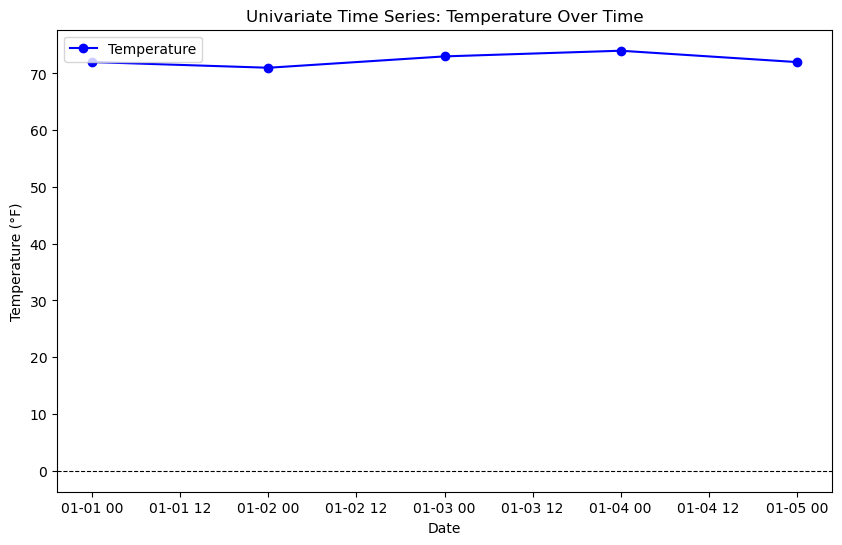

In [46]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt


# Sample temperature data
data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
    'Temperature': [72, 71, 73, 74, 72]
}

# Convert data to DataFrame
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


# Use the plot_time_series function to plot
plot_time_series(
    data=[df['Temperature']],
    labels=['Temperature'],
    title='Univariate Time Series: Temperature Over Time',
    xlabel='Date',
    ylabel='Temperature (°F)',
    colors=['blue'],
    markers=['o']
)



## **Multivariate Time Series**

Multivariate time series track multiple variables over time, such as temperature and humidity.


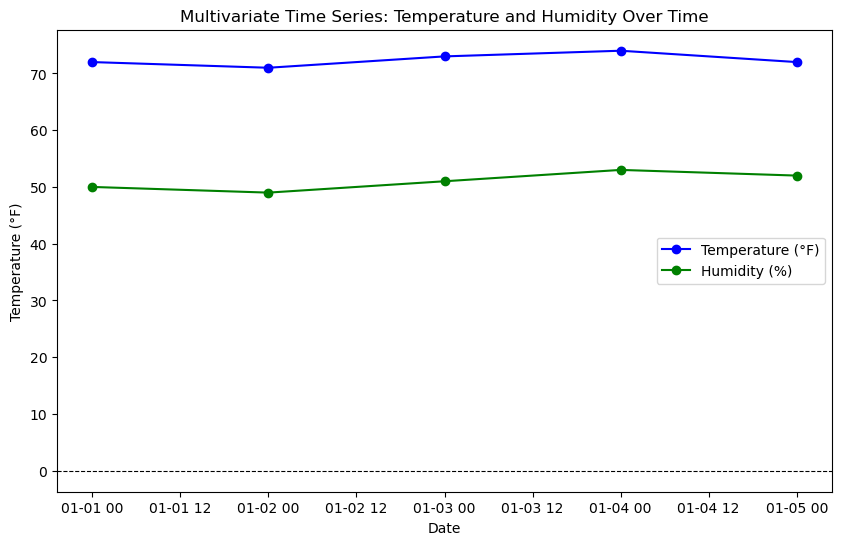

In [15]:
# Multivariate data
data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
    'Temperature': [72, 71, 73, 74, 72],
    'Humidity': [50, 49, 51, 53, 52]
}

# Convert data to DataFrame
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Use the reusable function to plot
plot_time_series(
    data=[df['Temperature'], df['Humidity']],
    labels=['Temperature (°F)', 'Humidity (%)'],
    title='Multivariate Time Series: Temperature and Humidity Over Time',
    xlabel='Date',
    ylabel='Temperature (°F)',
    colors=['blue', 'green'],
    markers=['o', 'o']
)



## **Identifying Patterns**

Time series often contain patterns such as:

1. **Trends**: Long-term increases or decreases in data.
2. **Seasonality**: Recurring patterns over fixed periods.
3. **Noise**: Random fluctuations that obscure patterns.


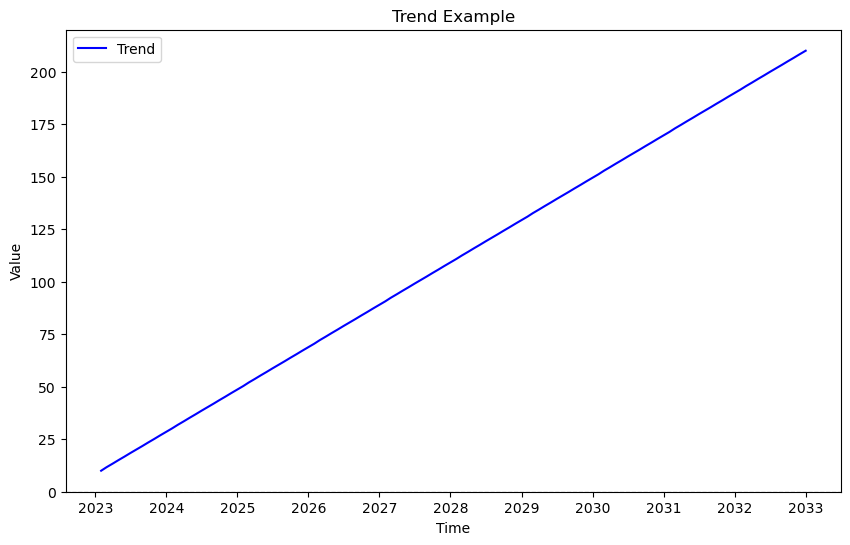

In [49]:
import numpy as np

time = pd.date_range('2023-01-01', periods=120, freq='ME')
trend = np.linspace(10, 210, num=120)

df_trend = pd.DataFrame({'Time': time, 'Trend': trend})
df_trend.set_index('Time', inplace=True)

plot_time_series(
    data=[df_trend['Trend']],
    labels=['Trend'],
    title='Trend Example',
    xlabel='Time',
    ylabel='Value',
    colors=['Blue']
)

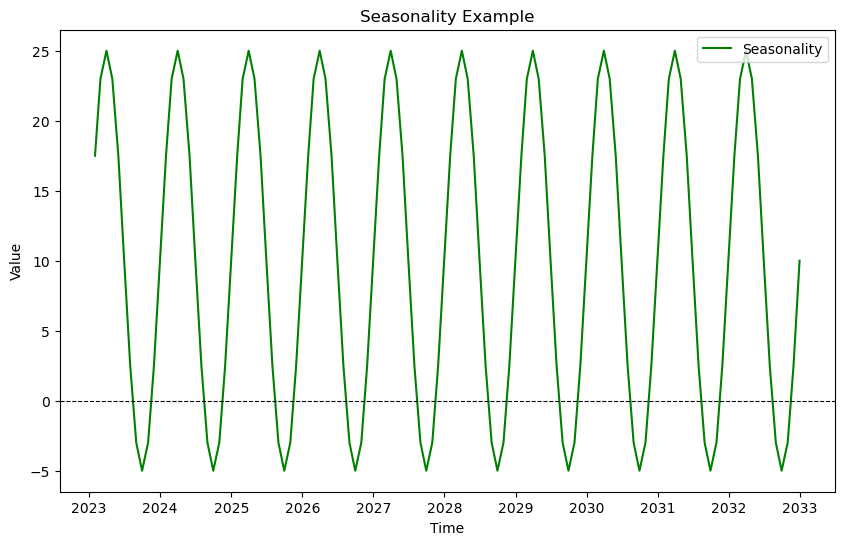

In [51]:
# genratae seasonality
time = pd.date_range('2023-01-01', periods=120, freq='ME')
seasonality = 10 + 15 * np.sin(2 * np.pi * time.month / 12)

df_seasonality = pd.DataFrame({'Time': time, 'Seasonality': seasonality})
df_seasonality.set_index('Time', inplace=True)

plot_time_series(
    data=[df_seasonality['Seasonality']],
    labels=['Seasonality'],
    title='Seasonality Example',
    xlabel='Time',
    ylabel='Value',
    colors=['green']
)

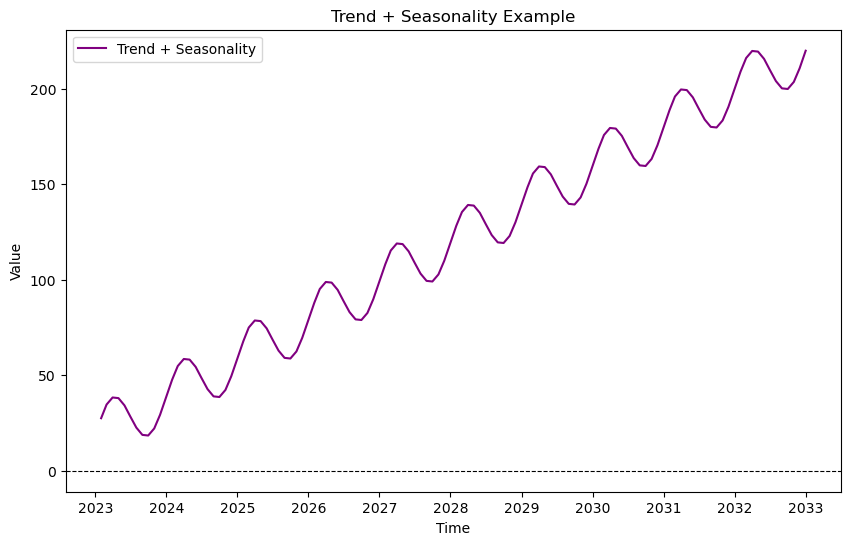

In [53]:
trend_seasonality = trend + seasonality

df_combined = pd.DataFrame({'Time': time, 'Trend + Seasonality': trend_seasonality})
df_combined.set_index('Time', inplace=True)

plot_time_series(
    data=[df_combined['Trend + Seasonality']],
    labels=['Trend + Seasonality'],
    title='Trend + Seasonality Example',
    xlabel='Time',
    ylabel='Value',
    colors=['purple']
)

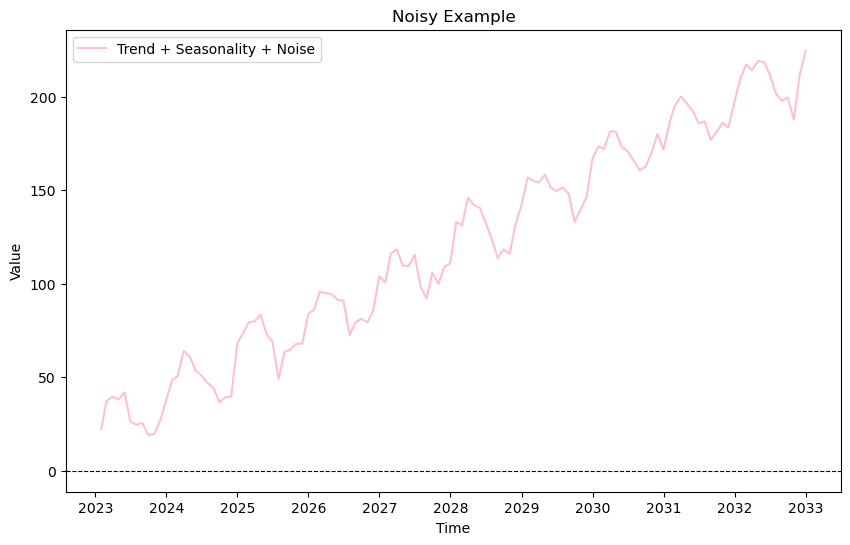

In [55]:
noise = trend_seasonality + 5 * np.random.normal(size=120)

df_noisy = pd.DataFrame({'Time': time, 'Noise': noise})
df_noisy.set_index('Time', inplace=True)

plot_time_series(
    data=[df_noisy['Noise']],
    labels=['Trend + Seasonality + Noise'],
    title='Noisy Example',
    xlabel='Time',
    ylabel='Value',
    colors=['pink']
)


## **Metrics for Evaluating Predictions**

When building time series models, it’s essential to measure accuracy. Common metrics include:

- **Mean Squared Error (MSE)**: Penalizes larger errors more heavily.
- **Root Mean Squared Error (RMSE)**: The square root of MSE, keeping units the same.
- **Mean Absolute Error (MAE)**: Focuses on average absolute errors.



In [33]:
forecasts = np.array([72, 71, 73, 74, 72])
actuals = np.array([73, 70, 74, 75, 73])

errors = forecasts - actuals
errors

array([-1,  1, -1, -1, -1])

In [37]:
print(errors[0] ** 2)
print(errors[1] ** 2)
print(errors[2] ** 2)
print(errors[3] ** 2)
print(errors[4] ** 2)

1
1
1
1
1


In [40]:
MSE = 5/5

In [41]:
MSE

1.0

In [43]:
RMSE = (sum((errors ** 2)) / len(errors)) ** 0.5

In [44]:
RMSE

1.0

In [45]:
# MAE
MAE = sum(abs(errors)) / len(errors)
MAE

1.0

In [ ]:
#CHALLENGE
